In [2]:
  import pandas as pd 
    

In [3]:
data = pd.read_csv("C:/Users/Slayem/Desktop/portfolio/insurance.csv")

In [4]:
data.tail


<bound method NDFrame.tail of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.shape

(1338, 7)

In [7]:
print("Le nombre des linges de ce jeu de données est {}".format(data.shape[0]))

Le nombre des linges de ce jeu de données est 1338


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [12]:
data.duplicated().sum()

1

In [13]:
//effacer les duplications

SyntaxError: invalid syntax (1851679486.py, line 1)

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data.duplicated().sum()

0

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data.value_counts("sex")

sex
male      675
female    662
dtype: int64

<Axes: xlabel='sex', ylabel='count'>

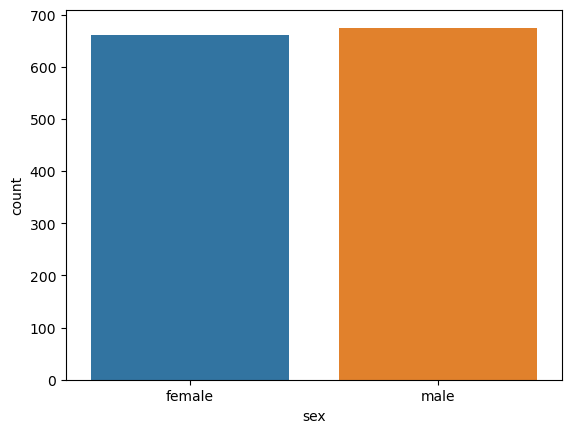

In [19]:
sns.countplot(x="sex",data=data)

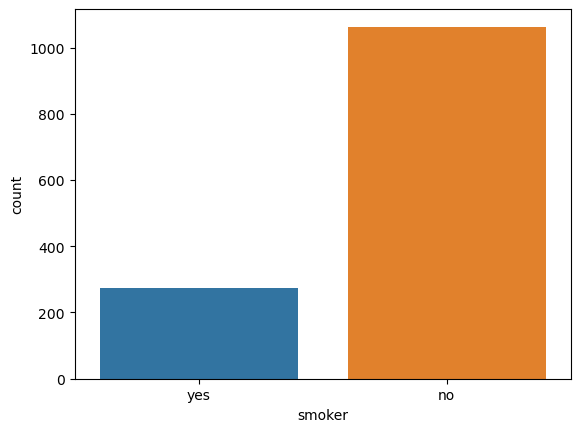

In [20]:
sns.countplot(x="smoker",data=data)
plt.show()

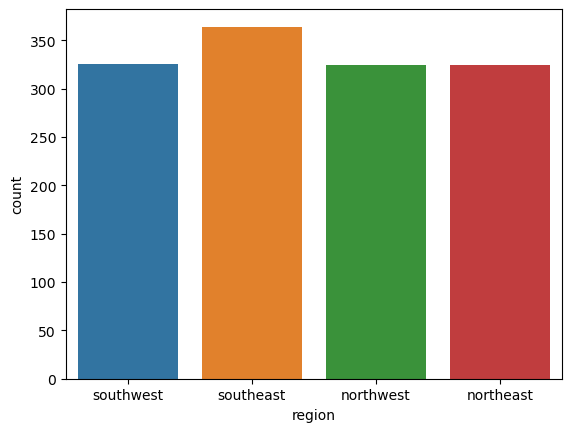

In [21]:
sns.countplot(x="region",data=data)
plt.show()

In [22]:
from sklearn import preprocessing

In [23]:
labelencoder = preprocessing.LabelEncoder()

In [24]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
data["smoker"] = labelencoder.fit_transform(data["smoker"]) 

In [26]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [27]:
data["sex"] = labelencoder.fit_transform(data["sex"])
data["region"] = labelencoder.fit_transform(data["region"]) 

In [28]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [30]:
data.corr()["charges"].sort_values(ascending=False)


charges     1.000000
smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
sex         0.058044
region     -0.006547
Name: charges, dtype: float64

<Axes: >

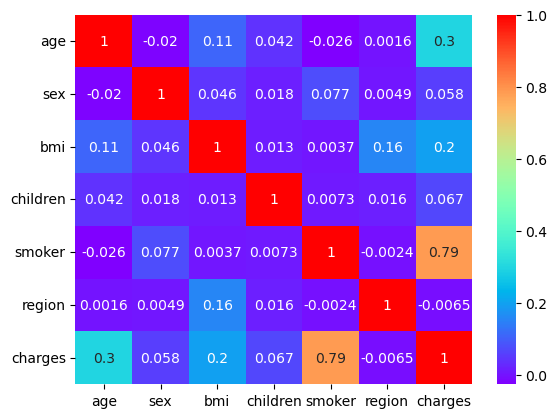

In [31]:
sns.heatmap(data.corr(),annot=True,cmap='rainbow')

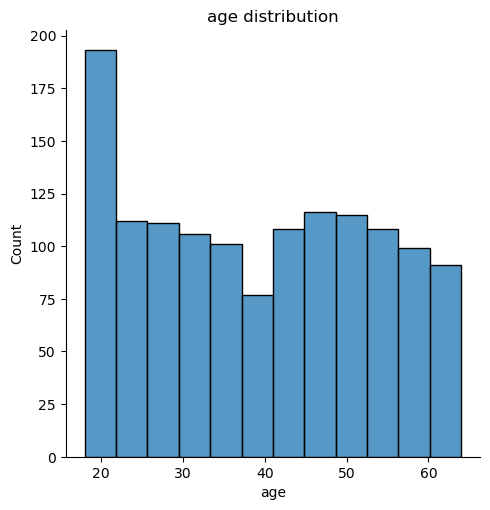

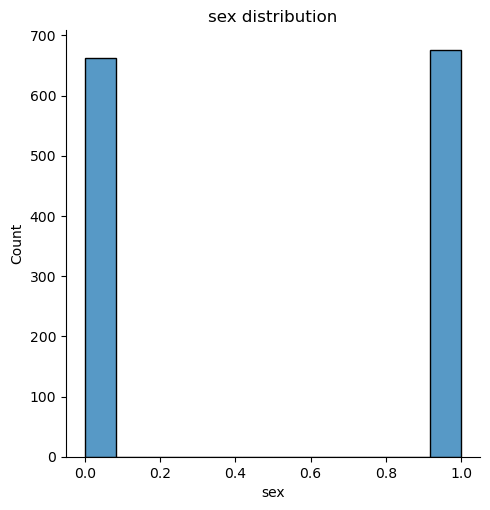

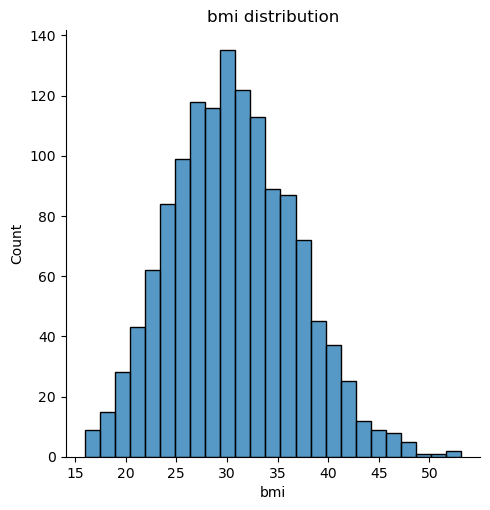

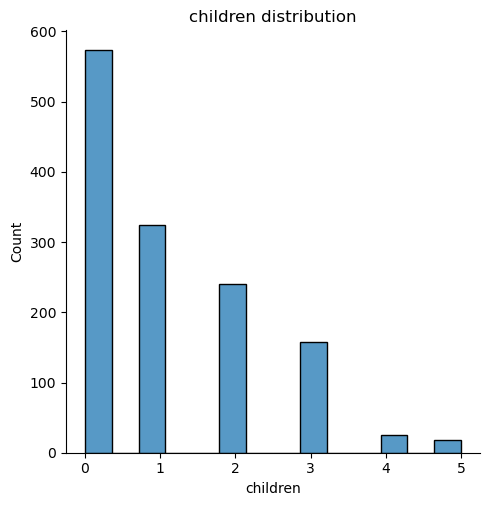

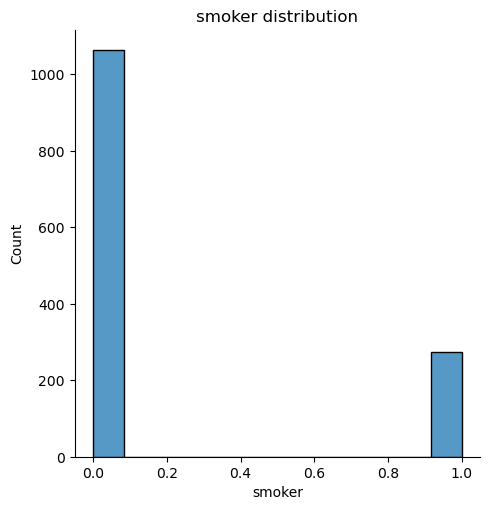

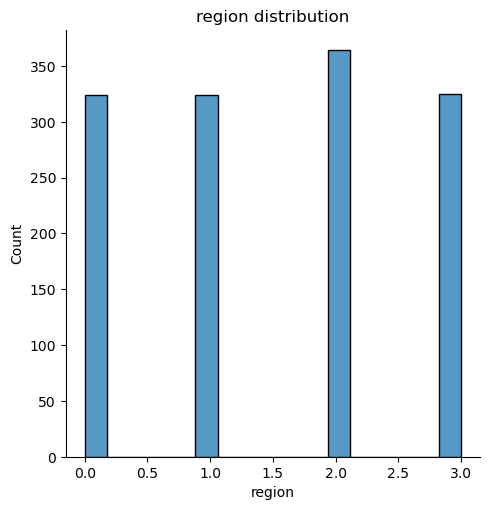

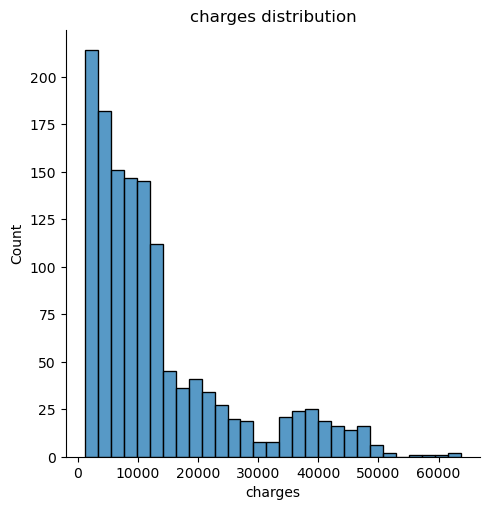

In [34]:
for i in data.columns:
    sns.displot(data[i])
    plt.title(i+" "+"distribution")
    plt.show()

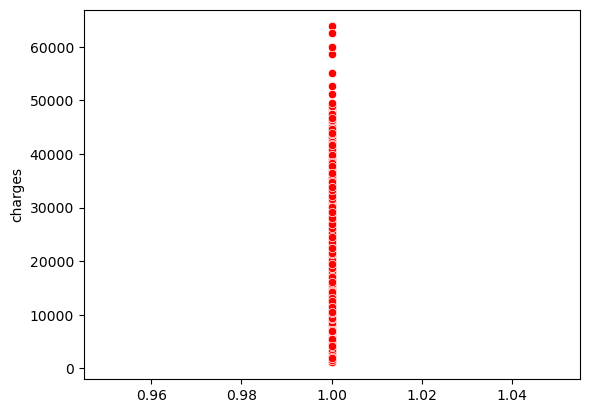

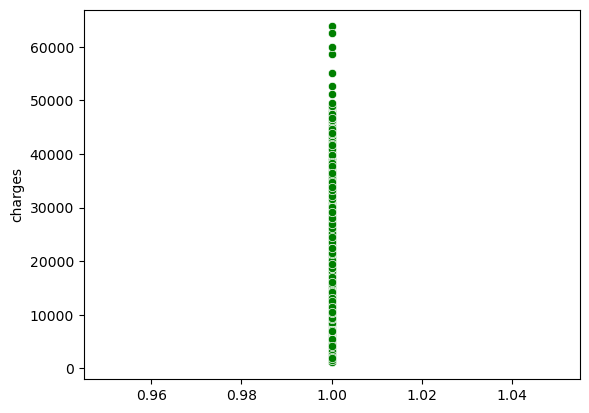

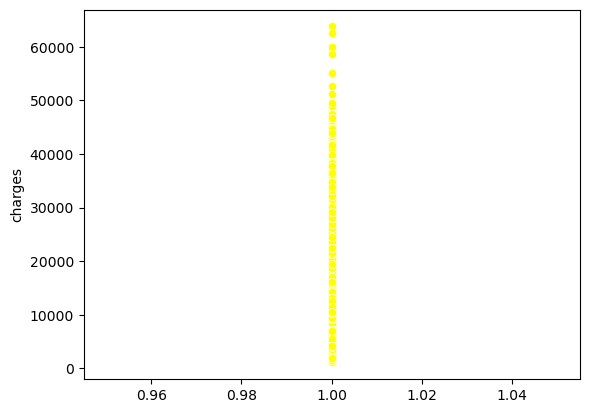

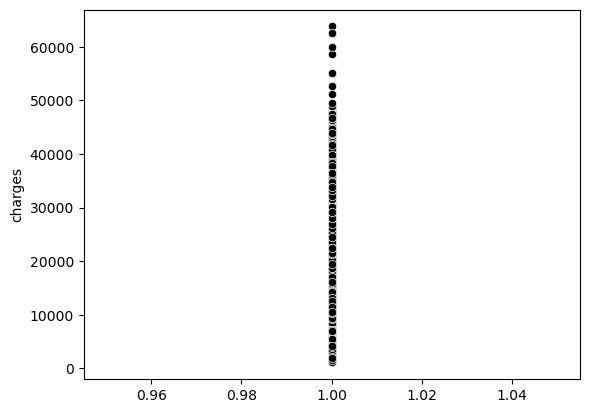

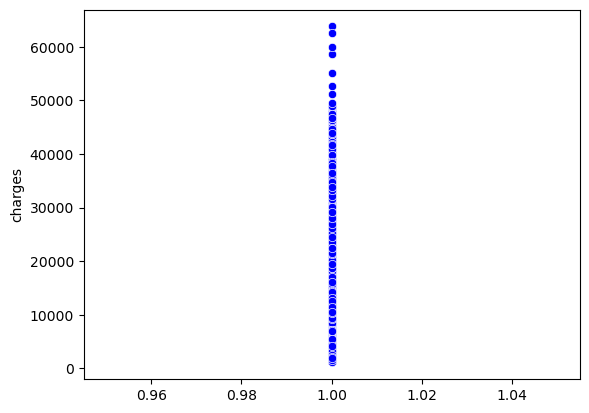

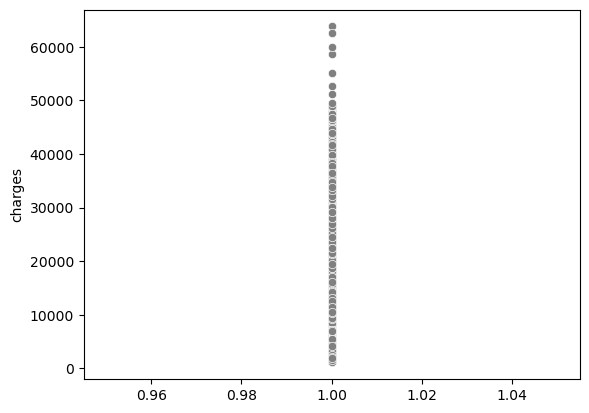

In [42]:
colorsforx = ["Red", "Green", "Yellow", "Black", "Blue", "Grey"]

colorchanger = 0

for i in data.columns[:-1]:
    sns.scatterplot(data=data, x=1, y="charges", color=colorsforx[colorchanger])
    plt.show()
    colorchanger = (colorchanger + 1) % len(colorsforx)


In [43]:
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
//predict

In [56]:
X = data[["age","sex","bmi","children","smoker","region"]]
y = data["charges"] 

In [57]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.30)

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [74]:
import numpy as np
from sklearn.metrics import mean_absolute_error , mean_squared_error
def modelresults(predections):
    print ("Mean absolute error on this model is {}".format(mean_absolute_error(y_test,predections)))
    print ("Root mean squared error on model is {}".format(np.sqrt(mean_squared_error(y_test,predections))))

In [75]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(scaled_X_train,y_train)

LinearRegression()

In [76]:
predslr = lr.predict(scaled_X_test)
modelresults(predslr)

Mean absolute error on this model is 3968.0736093206815
Root mean squared error on model is 5836.786926299766


In [80]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svrmodel = SVR()
param_gridsvr = {'C':[0.001,0.01,0.1,0.5,1],'kernel':['linear','rbf','poly'],'gamma':['scale','auto'],'degree':[2,3,4,5]}
gridsvr = GridSearchCV(svrmodel,param_gridsvr)
gridsvr.fit(scaled_X_train,y_train)
print("Best parameters for model is {}".format(gridsvr.best_params_))

Best parameters for model is {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [81]:
predgridsvr = gridsvr.predict(scaled_X_test)
modelresults(predgridsvr)

Mean absolute error on this model is 7821.112707740626
Root mean squared error on model is 12506.249191893647


In [83]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor()
param_gridrfr = {'bootstrap':[True],'max_depth':[5,10,15],'max_features':['auto','log2'],'n_estimators':[2,3,4,5,6,7,8,9,10]}
gridrfr = GridSearchCV(rfrmodel,param_gridrfr)
gridrfr.fit(scaled_X_train,y_train)

C:\Users\Slayem\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Slayem\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Slayem\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

C:\Users\Slayem\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Slayem\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Slayem\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

C:\Users\Slayem\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Slayem\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Slayem\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

C:\Users\Slayem\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Slayem\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Slayem\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

C:\Users\Slayem\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Slayem\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\Slayem\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [89]:
predgridrfr = gridrfr.predict(scaled_X_test)
modelresults(predgridrfr)


Mean absolute error on this model is 2211.8414791421683
Root mean squared error on model is 4377.964060664444


In [90]:
X.columns



Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [94]:
columniterate = 1
for index in X.columns : 
    mean = data[index].mean()
    print ("The mean of the columns {} is {}".format(columniterate,mean))
    columniterate +=1 

The mean of the columns 1 is 39.222139117427076
The mean of the columns 2 is 0.5048616305160808
The mean of the columns 3 is 30.66345175766642
The mean of the columns 4 is 1.0957367240089753
The mean of the columns 5 is 0.2049364248317128
The mean of the columns 6 is 1.5160807778608825


In [95]:
newcustomer = np.array([39,0,30,1,0,1])

In [96]:
gridrfr.predict(newcustomer.reshape(1,-1))

array([15407.0662759])

In [101]:
print("The insurence cost of new customer is {}" .format(gridrfr.predict(newcustomer.reshape(1,-1))[0]))

The insurence cost of new customer is 15407.066275901057
